In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd

# 데이터를 먼저 로드합니다.
df= pd.read_table("/Users/ohheungchan/workspace/AI_Study/heart+disease/reprocessed.hungarian.data", sep=' ', header=None)

# 열 이름을 변경합니다.
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# DataFrame을 확인합니다.
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


Text(0.5, 1.0, 'num')

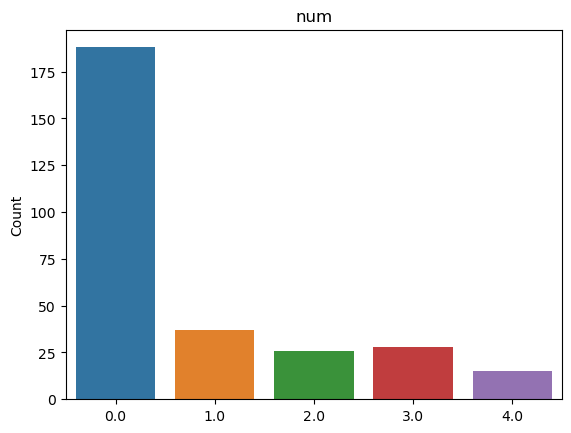

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="num")
plt.xlabel("")
plt.ylabel("Count")
plt.title("num")

In [5]:
sampled_df = pd.DataFrame()  # 추출된 데이터를 저장할 빈 DataFrame 생성
classes = df['num'].unique()  # 'num' 열의 고유값을 추출하여 클래스 목록 생성

for cls in classes:
    class_df = df[df['num'] == cls]  # 현재 클래스에 해당하는 데이터만 필터링
    if len(class_df) > 0:  # 현재 클래스에 샘플이 있는 경우에만 샘플링 수행
        sampled_class_df = class_df.sample(n=150, replace=True)  # 클래스 데이터에서 150개 샘플 추출, replace=True는 데이터가 150개 미만일 때 중복 허용
        sampled_df = pd.concat([sampled_df, sampled_class_df], ignore_index=True)  # 추출된 데이터를 sampled_df에 추가

df =sampled_df
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,56.0,1.0,3.0,130.0,-9.0,0.0,0.0,114.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,32.0,1.0,2.0,125.0,254.0,0.0,0.0,155.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,50.0,0.0,2.0,110.0,202.0,0.0,0.0,145.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
4,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,58.0,1.0,4.0,130.0,263.0,0.0,0.0,140.0,1.0,2.0,2.0,-9.0,-9.0,2.0
746,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0,2.0
747,32.0,1.0,4.0,118.0,529.0,0.0,0.0,130.0,0.0,0.0,-9.0,-9.0,-9.0,2.0
748,39.0,1.0,4.0,110.0,280.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,6.0,2.0


In [6]:
# 데이터프레임을 4배로 증가시킵니다.
new_df = pd.concat([df] * 4, ignore_index=True)

# 결과를 확인합니다.
df = new_df

Text(0.5, 1.0, 'num')

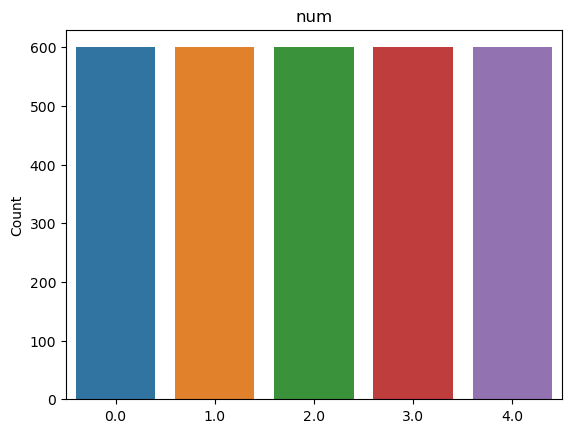

In [7]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="num")
plt.xlabel("")
plt.ylabel("Count")
plt.title("num")

In [8]:
df['num'].value_counts()

num
0.0    600
1.0    600
3.0    600
4.0    600
2.0    600
Name: count, dtype: int64

In [9]:
# 결측치 확인
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,56.0,1.0,3.0,130.0,-9.0,0.0,0.0,114.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,32.0,1.0,2.0,125.0,254.0,0.0,0.0,155.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,50.0,0.0,2.0,110.0,202.0,0.0,0.0,145.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
4,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,58.0,1.0,4.0,130.0,263.0,0.0,0.0,140.0,1.0,2.0,2.0,-9.0,-9.0,2.0
2996,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0,2.0
2997,32.0,1.0,4.0,118.0,529.0,0.0,0.0,130.0,0.0,0.0,-9.0,-9.0,-9.0,2.0
2998,39.0,1.0,4.0,110.0,280.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,6.0,2.0


In [12]:
X=df.drop('num',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,56.0,1.0,3.0,130.0,-9.0,0.0,0.0,114.0,0.0,0.0,-9.0,-9.0,-9.0
1,32.0,1.0,2.0,125.0,254.0,0.0,0.0,155.0,0.0,0.0,-9.0,-9.0,-9.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0
3,50.0,0.0,2.0,110.0,202.0,0.0,0.0,145.0,0.0,0.0,-9.0,-9.0,-9.0
4,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0


In [13]:
y=df['num']
y.value_counts()

num
0.0    600
1.0    600
3.0    600
4.0    600
2.0    600
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [27]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [28]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 10)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 10)
print(X_test.shape, y_test.shape)   

(2391, 10, 13) (2391,)
(591, 10, 13) (591,)


In [29]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [30]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout,LSTM,Reshape

In [31]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [40]:
from keras.models import Sequential
model = Sequential()
model.add(LSTM(units = 128, input_shape = [n_timesteps, n_features], return_sequences=True,activation = 'tanh'))
model.add(LSTM(units = 128, activation = 'tanh'))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "tanh"))
model.add(Dense(n_outputs, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10, 128)           72704     
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 221,445
Trainable params: 221,445
Non-trainable params: 0
_________________________________________________________________


In [41]:
train_epochs = 100
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True, validation_split = 0.1)

Epoch 1/100


2024-02-24 21:04:25.141494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-24 21:04:25.377569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-24 21:04:26.095635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-24 21:04:26.354838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-24 21:04:26.696478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - ETA: 0s - loss: 1.5749 - accuracy: 0.2692

2024-02-24 21:04:30.107616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-24 21:04:30.197283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-24 21:04:30.287568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 7s 55ms/step - loss: 1.5749 - accuracy: 0.2692 - val_loss: 1.4872 - val_accuracy: 0.3167
Epoch 2/100
68/68 [==============================] - 2s 31ms/step - loss: 1.4133 - accuracy: 0.3519 - val_loss: 1.3464 - val_accuracy: 0.3792
Epoch 3/100
68/68 [==============================] - 2s 30ms/step - loss: 1.3439 - accuracy: 0.3887 - val_loss: 1.2747 - val_accuracy: 0.4500
Epoch 4/100
68/68 [==============================] - 2s 31ms/step - loss: 1.3230 - accuracy: 0.4026 - val_loss: 1.2321 - val_accuracy: 0.4250
Epoch 5/100
68/68 [==============================] - 2s 33ms/step - loss: 1.2593 - accuracy: 0.4468 - val_loss: 1.1869 - val_accuracy: 0.5125
Epoch 6/100
68/68 [==============================] - 2s 32ms/step - loss: 1.2025 - accuracy: 0.4714 - val_loss: 1.1596 - val_accuracy: 0.5208
Epoch 7/100
68/68 [==============================] - 2s 31ms/step - loss: 1.1690 - accuracy: 0.5091 - val_loss: 1.0533 - val_accuracy: 0.5750
Epoch 8/100
68/68 

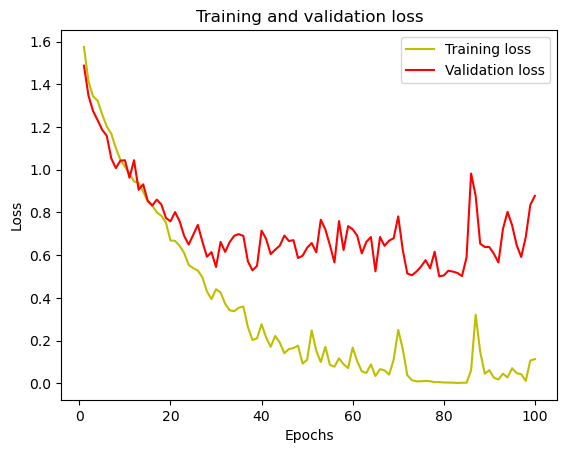

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

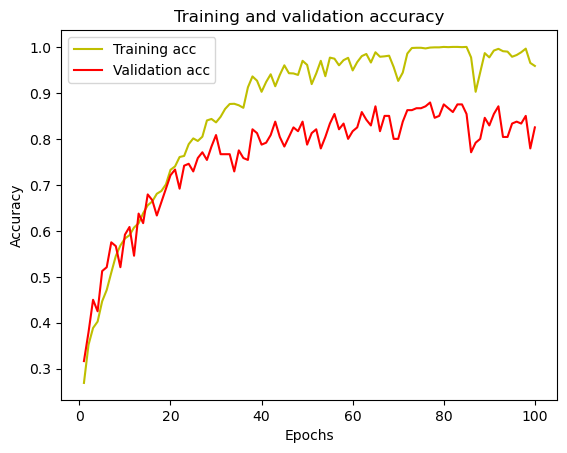

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix



y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

2024-02-24 21:08:21.084697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-24 21:08:21.156462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-24 21:08:21.264321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 1s 34ms/step


In [45]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       0.87      0.71      0.78       125
           1       0.72      0.79      0.75       113
           2       0.79      0.78      0.79       125
           3       0.81      0.90      0.85       110
           4       0.81      0.81      0.81       118

    accuracy                           0.80       591
   macro avg       0.80      0.80      0.80       591
weighted avg       0.80      0.80      0.80       591

[[89 15 11  8  2]
 [ 3 89  9  2 10]
 [ 9  4 98  8  6]
 [ 1  4  1 99  5]
 [ 0 12  5  5 96]]
